## Objective - Sucide rate analysis

The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.

### Questions to explore
<li>Is the suicide rate more prominent in some age categories than others?</li>
<li>Which countries have the most and the least number of suicides?
<li>What is the effect of the population on suicide rates?
<li>What is the effect of the GDP of a country on suicide rates?
<li>What is the trend of suicide rates across all the years?
<li>Is there a difference between the suicide rates of men and women?
    
#### 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


### Step 1 - Import and inspect the data

In [3]:
df = pd.read_csv("datasets\\SuicideRateData.csv")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


### Step 2 - Review Data 
    - Info => count, non-null values, data types, column names
    - Shape
    - describe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
df.shape

(27820, 12)

### Step 3 - Check for missing values

In [7]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)


,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


##### Find by country , male and female suicide rates

In [8]:
dfc1 = df.groupby(['country', 'sex'])['suicides_no'].sum().to_frame().unstack(level=0).reset_index()
#dfc1.rename(columns={'country': 'Country', 'male': 'Male', 'female': 'Female'}, index={'sex': 'Index'}, inplace=True)

dfc1

sex suicides_no                                              \
country             Albania Antigua and Barbuda Argentina Armenia Aruba   
0        female         693                   1     18326     495    17   
1          male        1277                  10     63893    1410    84   

                                              ...           \
country Australia Austria Azerbaijan Bahamas  ... Thailand   
0           15326   13195        412      14  ...    28101   
1           54785   36878       1244      79  ...    82542   

                                                                              \
country Trinidad and Tobago Turkey Turkmenistan Ukraine United Arab Emirates   
0                       820   2569         2096   61377                   98   
1                      3219   7562         6528  258573                  524   

                                                         
country United Kingdom United States Uruguay Uzbekistan  
0                32687        213797    2820       9260  
1               104118        820216   10318      25543  

[2 rows x 102 columns]

### Q1 - Is the suicide rate more prominent in some age categories than others?
##### <li> Categorical vs Numerical


In [9]:
df[df.age == '5-14 years']['suicides_no'].sum()

52264

In [10]:
##my_tab = pd.crosstab(index=df["age"],  # Make a crosstab
##                     columns="count")                  # Name the count column

my_tab = pd.crosstab(df.age, df.sex, values=df.suicides_no, aggfunc="sum").copy()
my_tab['Total'] = my_tab.female + my_tab.male
my_tab


sex,female,male,Total
age,,,
15-24 years,175437,633105,808542
25-34 years,208823,915089,1123912
35-54 years,506233,1945908,2452141
5-14 years,16997,35267,52264
55-74 years,430036,1228407,1658443
75+ years,221984,431134,653118


In [11]:
my_tab.reset_index(inplace=True)
my_tab

sex,age,female,male,Total
0,15-24 years,175437,633105,808542
1,25-34 years,208823,915089,1123912
2,35-54 years,506233,1945908,2452141
3,5-14 years,16997,35267,52264
4,55-74 years,430036,1228407,1658443
5,75+ years,221984,431134,653118


In [12]:
my_tab.loc[5].male=43120

C:\Users\coool\AppData\Local\Temp\ipykernel_1776\2712836352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_tab.loc[5].male=43120


Text(0.5, 1.0, 'Suicides across age groups')

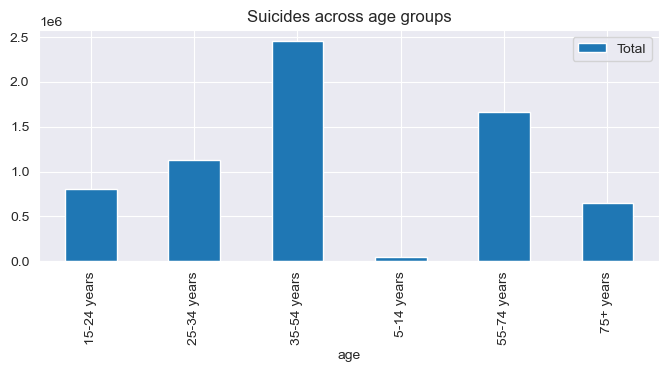

In [13]:
my_tab.plot(x='age',
        y='Total',
        kind='bar',
        figsize=(8,3))
plt.title("Suicides across age groups")

In [14]:
dfs1 = pd.melt(my_tab, id_vars = "age")
dfs2 = dfs1[(dfs1.sex != 'Total')]
dfs2

,age,sex,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267


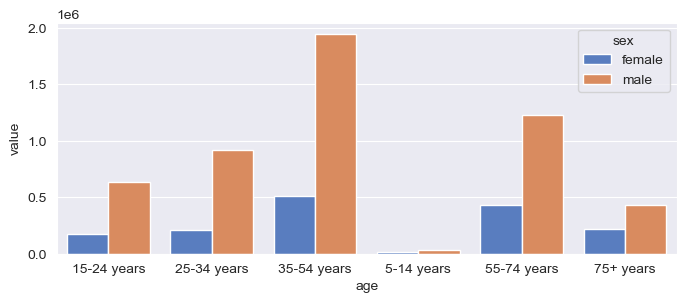

In [15]:
plt.figure(figsize=(8,3))  # setting the figure size
#ax = sns.barplot(x='age', y='value', data=dfs2, hue='sex', palette='muted')  # barplot
sns.barplot(x='age', y='value', data=dfs2, hue='sex', palette='muted')  # barplot
plt.show()

<AxesSubplot:xlabel='sex', ylabel='value'>

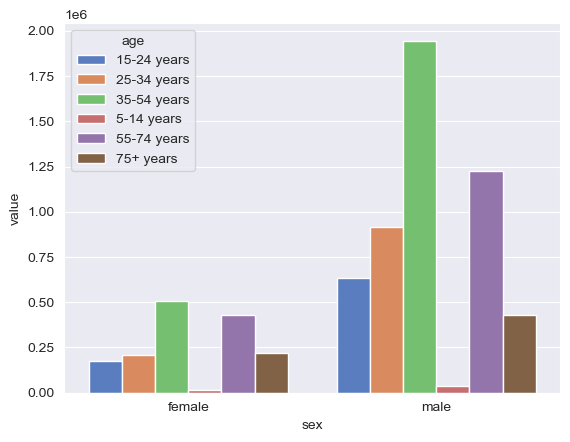

In [16]:
sns.barplot(x='sex', y='value', data=dfs2, hue='age', palette='muted')  # barplot

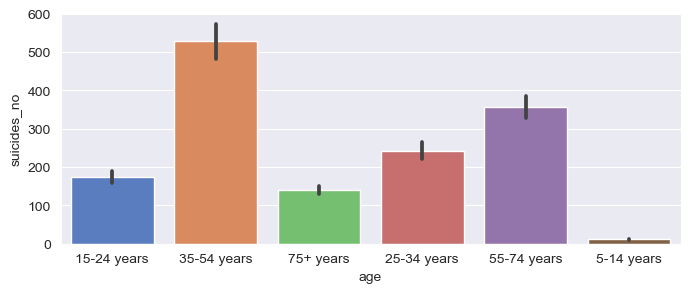

In [17]:
plt.figure(figsize=(8,3))  # setting the figure size
ax = sns.barplot(x='age', y='suicides_no', data=df, palette='muted')  # barplot

### Q2  : Which countries have the most and the least number of suicides?

Text(0.5, 1.0, 'Top 10 Countries with the highest Suicides')

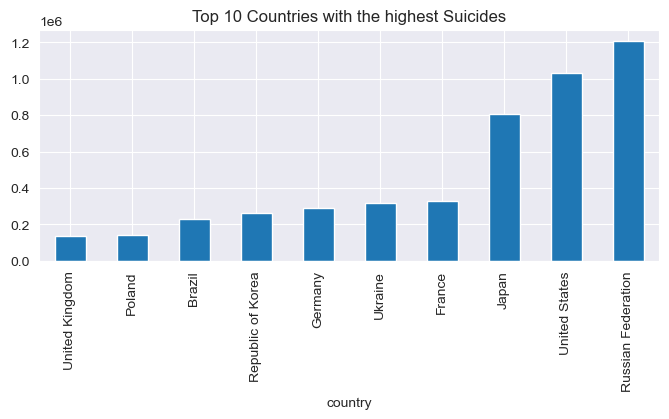

In [18]:
df.groupby('country')['suicides_no'].sum().sort_values().tail(10)\
        .plot(x='country', y='suicides_no', kind='bar', figsize=(8,3))
plt.title("Top 10 Countries with the highest Suicides")

Text(0.5, 1.0, 'Bottom 10 Countries with the highest Suicides')

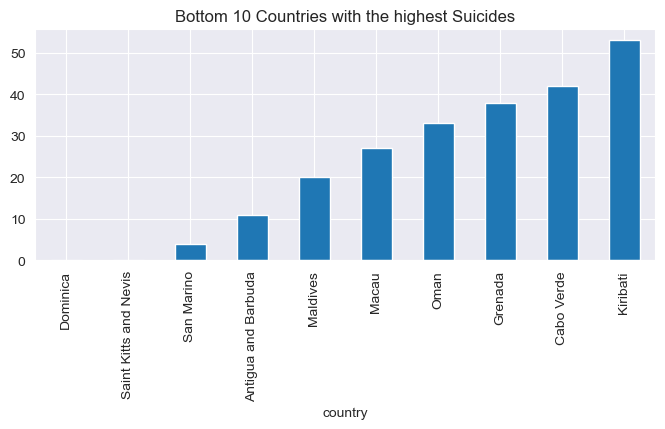

In [19]:
df.groupby('country')['suicides_no'].sum().sort_values().head(10)\
        .plot(x='country', y='suicides_no', kind='bar', figsize=(8,3))
plt.title("Bottom 10 Countries with the highest Suicides")

### Q3 - Suicide rates between generations
Categorical vs numerical

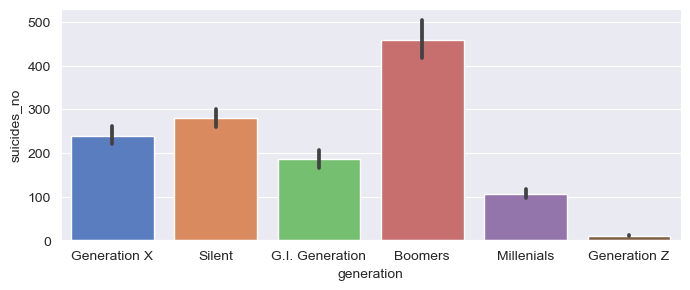

In [20]:
plt.figure(figsize=(8,3))  # setting the figure size
ax = sns.barplot(x='generation', y='suicides_no', data=df, palette='muted')  # barplot

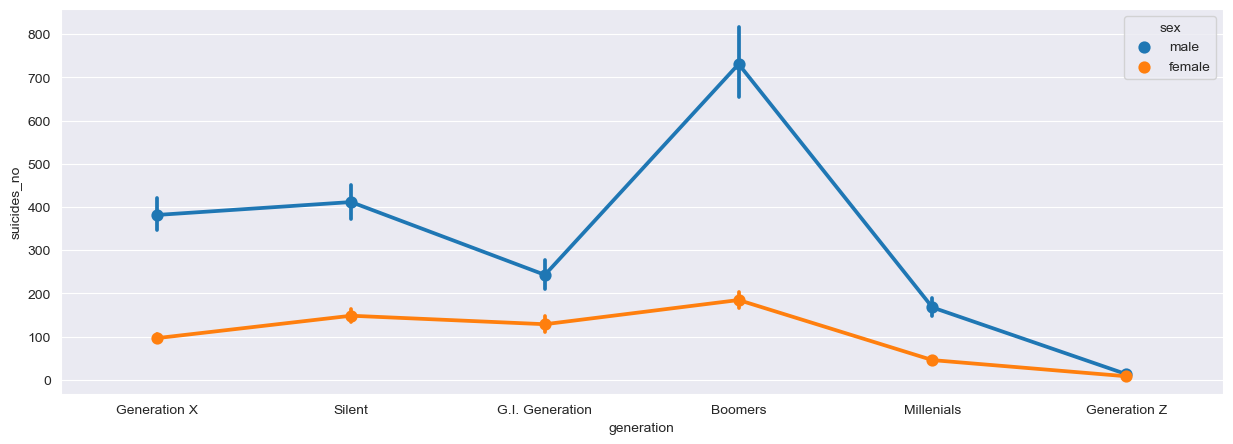

In [21]:
plt.figure(figsize=(15,5))

sns.pointplot(x="generation", y="suicides_no", hue = 'sex',  data=df)
plt.show()

<AxesSubplot:xlabel='generation', ylabel='suicides_no'>

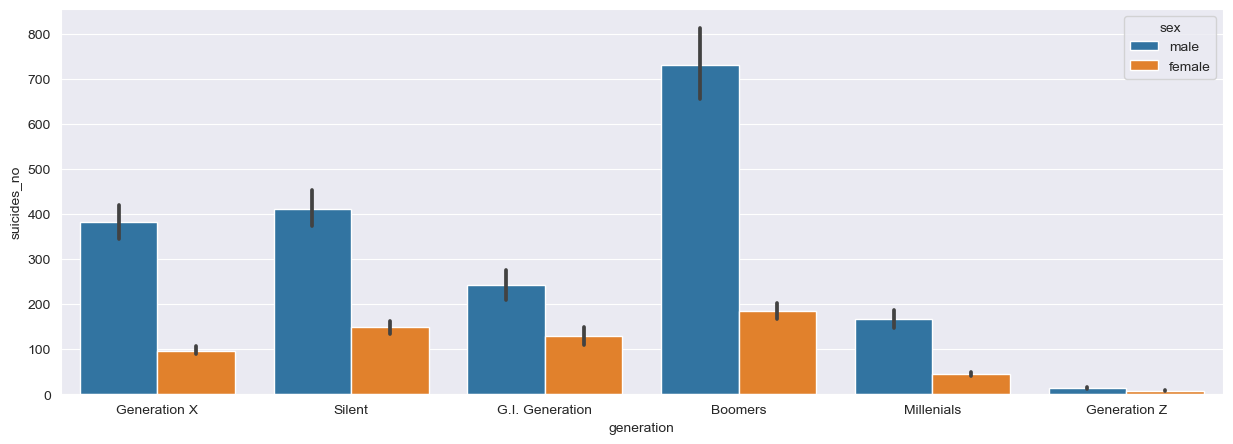

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x="generation", y="suicides_no",  hue='sex', data=df)


<AxesSubplot:xlabel='year', ylabel='suicides_no'>

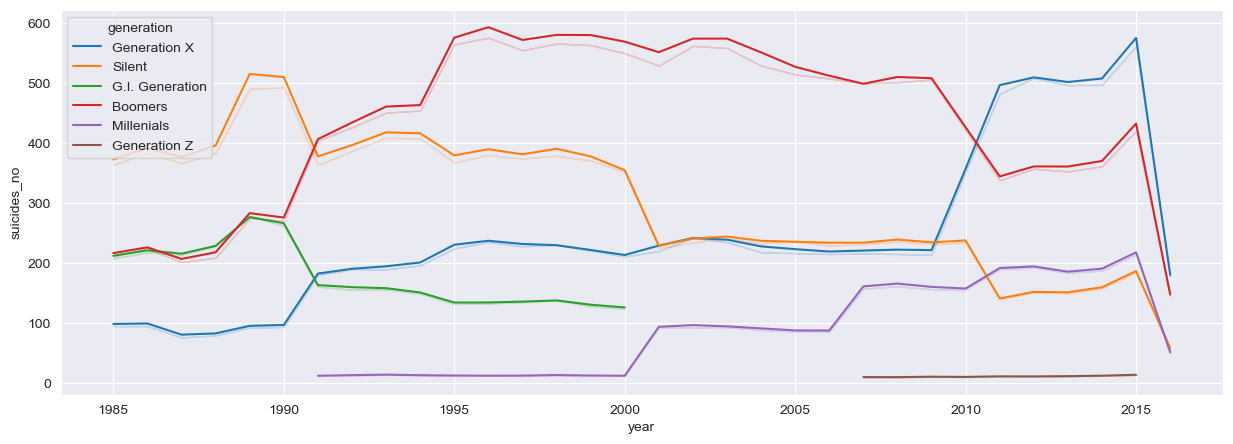

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(x="year", y="suicides_no", hue='generation', ci = 0, data=df)

### Good exercise on grouping, adding columns and flattening a multi-index dataframe

In [27]:
data = {"Team": ["Red Sox", "Red Sox", "Red Sox", "Red Sox", "Red Sox", "Red Sox", "Yankees", "Yankees"\
                     , "Yankees", "Yankees", "Yankees", "Yankees", "Yankees"],
        "Pos": ["Pitcher", "Pitcher", "Pitcher", "Not Pitcher", "Not Pitcher", "Not Pitcher", "Pitcher"\
                    , "Pitcher", "Pitcher", "Not Pitcher", "Not Pitcher", "Not Pitcher", "Pitcher"],
        "Age": [24, 28, 40, 22, 29, 33, 31, 26, 21, 36, 25, 31, 40]}
dfb = pd.DataFrame(data)
dfb

,Team,Pos,Age
0,Red Sox,Pitcher,24
1,Red Sox,Pitcher,28
2,Red Sox,Pitcher,40
3,Red Sox,Not Pitcher,22
4,Red Sox,Not Pitcher,29
5,Red Sox,Not Pitcher,33
6,Yankees,Pitcher,31
7,Yankees,Pitcher,26
8,Yankees,Pitcher,21
9,Yankees,Not Pitcher,36


In [28]:
dfb

,Team,Pos,Age
0,Red Sox,Pitcher,24
1,Red Sox,Pitcher,28
2,Red Sox,Pitcher,40
3,Red Sox,Not Pitcher,22
4,Red Sox,Not Pitcher,29
5,Red Sox,Not Pitcher,33
6,Yankees,Pitcher,31
7,Yankees,Pitcher,26
8,Yankees,Pitcher,21
9,Yankees,Not Pitcher,36


In [29]:
grouped_single = dfb.groupby('Team').agg({'Age': ['mean', 'min', 'max']})

grouped_single

Age        
              mean min max
Team                      
Red Sox  29.333333  22  40
Yankees  30.000000  21  40

In [30]:
grouped_single = grouped_single.reset_index()
grouped_single

Team        Age        
                 mean min max
0  Red Sox  29.333333  22  40
1  Yankees  30.000000  21  40

In [31]:
grouped_single.columns

MultiIndex([('Team',     ''),
            ( 'Age', 'mean'),
            ( 'Age',  'min'),
            ( 'Age',  'max')],
           )

In [32]:
grouped_multiple = dfb.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
grouped_multiple

Age        
                          mean min max
Team    Pos                           
Red Sox Not Pitcher  28.000000  22  33
        Pitcher      30.666667  24  40
Yankees Not Pitcher  30.666667  25  36
        Pitcher      29.500000  21  40

In [33]:
grouped_multiple = dfb.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
grouped_multiple.columns = ['age_mean', 'age_min', 'age_max']
grouped_multiple

age_mean  age_min  age_max
Team    Pos                                     
Red Sox Not Pitcher  28.000000       22       33
        Pitcher      30.666667       24       40
Yankees Not Pitcher  30.666667       25       36
        Pitcher      29.500000       21       40

In [34]:
grouped_multiple = dfb.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
grouped_multiple.columns = ['age_mean', 'age_min', 'age_max']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple

,Team,Pos,age_mean,age_min,age_max
0,Red Sox,Not Pitcher,28.000000,22,33
1,Red Sox,Pitcher,30.666667,24,40
2,Yankees,Not Pitcher,30.666667,25,36
3,Yankees,Pitcher,29.500000,21,40


In [35]:
grouped_multiple = dfb.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max', 'count', 'sum']})
grouped_multiple.columns = ['age_mean', 'age_min', 'age_max', 'count', 'sum - for fun']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple

,Team,Pos,age_mean,age_min,age_max,count,sum - for fun
0,Red Sox,Not Pitcher,28.000000,22,33,3,84
1,Red Sox,Pitcher,30.666667,24,40,3,92
2,Yankees,Not Pitcher,30.666667,25,36,3,92
3,Yankees,Pitcher,29.500000,21,40,4,118


In [36]:
## Let's do the above in a single statement

gm2 = dfb.groupby(['Team', 'Pos']).agg({'Age' : ['mean', 'min', 'max', 'count']})
gm2.columns=['age_mean', 'age_min', 'age_max', 'count']
gm2.reset_index(inplace=True)
gm2

,Team,Pos,age_mean,age_min,age_max,count
0,Red Sox,Not Pitcher,28.000000,22,33,3
1,Red Sox,Pitcher,30.666667,24,40,3
2,Yankees,Not Pitcher,30.666667,25,36,3
3,Yankees,Pitcher,29.500000,21,40,4
